In [198]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [199]:
df = pd.read_csv('NN_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10824 entries, 0 to 10823
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          10824 non-null  int64  
 1   Unnamed: 0            10824 non-null  int64  
 2   id                    10824 non-null  int64  
 3   title                 10824 non-null  object 
 4   vote_average          10824 non-null  float64
 5   vote_count            10824 non-null  int64  
 6   release_date          10824 non-null  object 
 7   revenue               10824 non-null  int64  
 8   runtime               10824 non-null  int64  
 9   adult                 10824 non-null  bool   
 10  budget                10824 non-null  int64  
 11  original_language     10824 non-null  object 
 12  overview              10824 non-null  object 
 13  popularity            10824 non-null  float64
 14  poster_path           10824 non-null  object 
 15  genres             

In [200]:
X = df['budget'].values
Y = df['revenue'].values

In [201]:

scaler = StandardScaler()

# Standardize the training data
X_scaled = scaler.fit_transform(X.reshape(-1, 1))
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).flatten()

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.35)
linreg = LinearRegression()



# Fit the model on the scaled training data
linreg.fit(X_train, Y_train)

LinearRegression()

In [202]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  -0.003781801750940175
Coefficients 	: a =  [0.75892025]


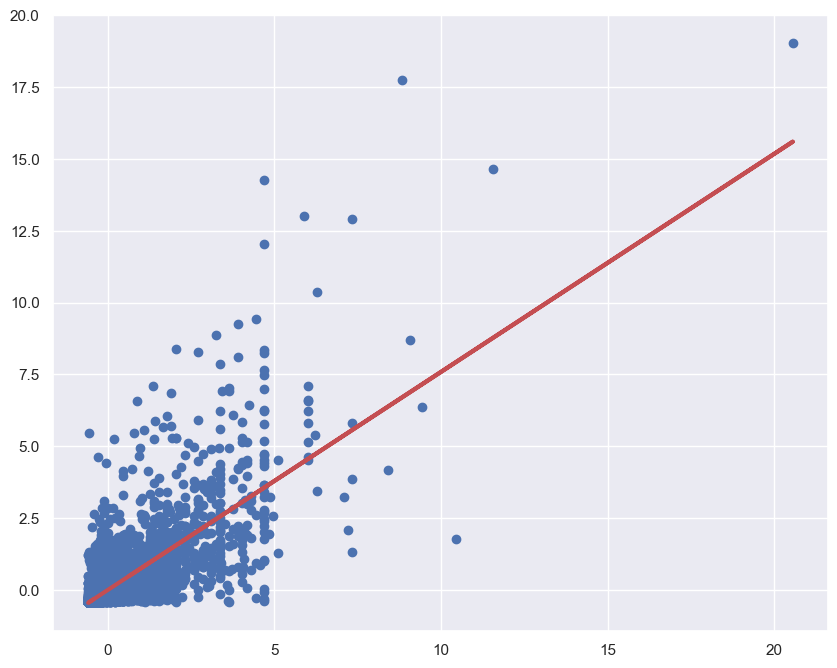

In [203]:

regline_x = X_train

regline_y = linreg.intercept_ + linreg.coef_ * regline_x

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(10, 8))

plt.scatter(X_train, Y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth=3)
plt.show()

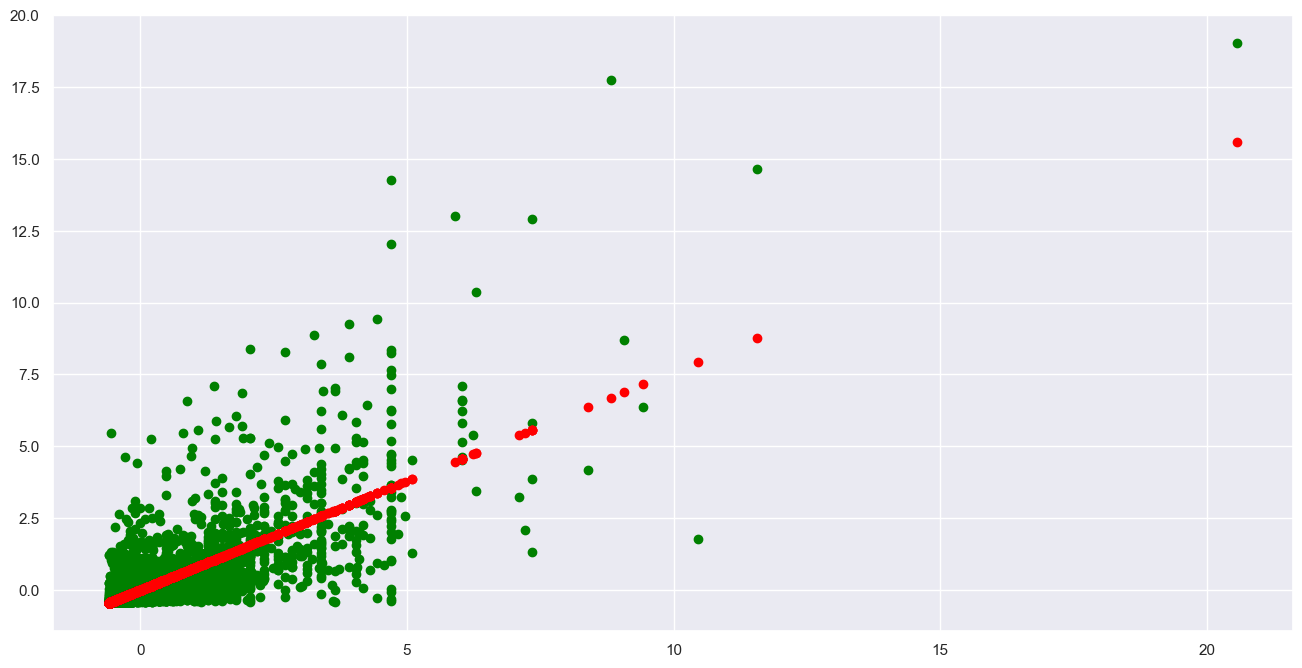

In [204]:
Y_train_pred = linreg.predict(X_train)
# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train,Y_train, color = "green")
plt.scatter(X_train,Y_train_pred, color = "red")
plt.show()

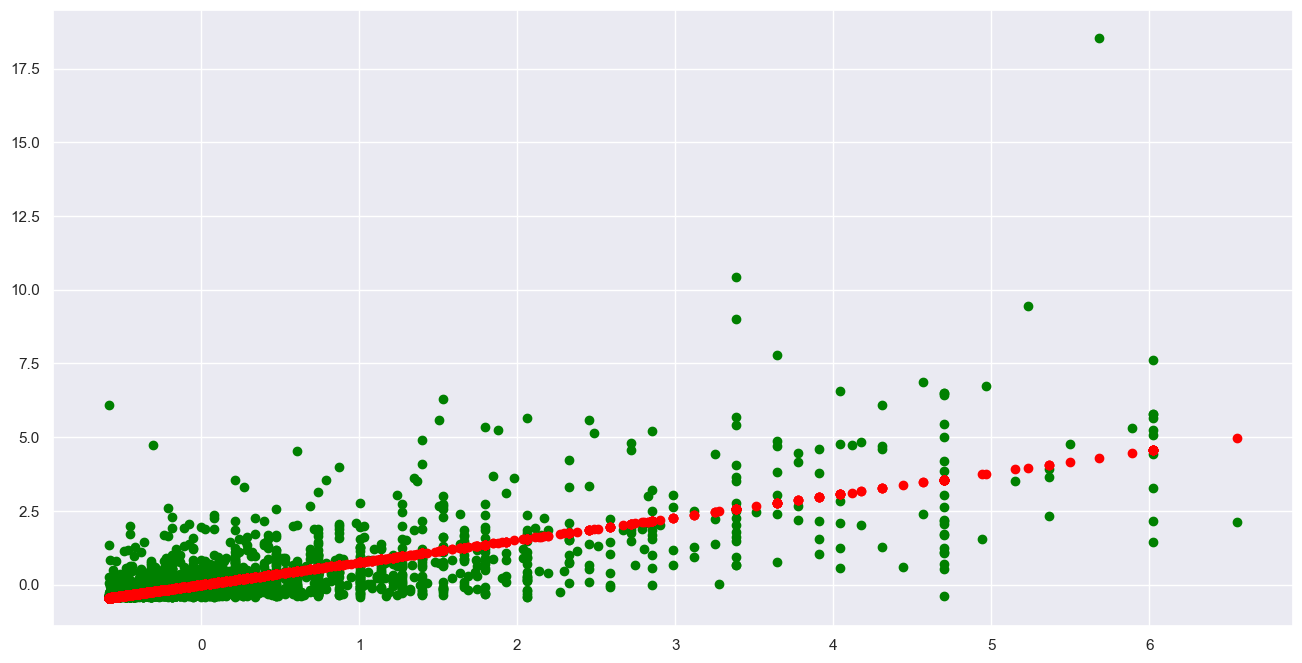

In [205]:
Y_test_pred = linreg.predict(X_test)
# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_test,Y_test, color = "green")
plt.scatter(X_test,Y_test_pred, color = "red")
plt.show()

In [206]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, Y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(X_test, Y_test))

Y_train_pred = linreg.predict(X_train)
train_mse = mean_squared_error(Y_train, Y_train_pred)
print(f'Training MSE: {train_mse:.2f}')

# Calculate the MSE for the testing data
Y_test_pred = linreg.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_test_pred)
print(f'Testing MSE: {test_mse:.2f}')

Explained Variance (R^2) on Train Set 	: 0.5724283217815516
Explained Variance (R^2) on Test Set 	: 0.545599812859948
Training MSE: 0.44
Testing MSE: 0.42


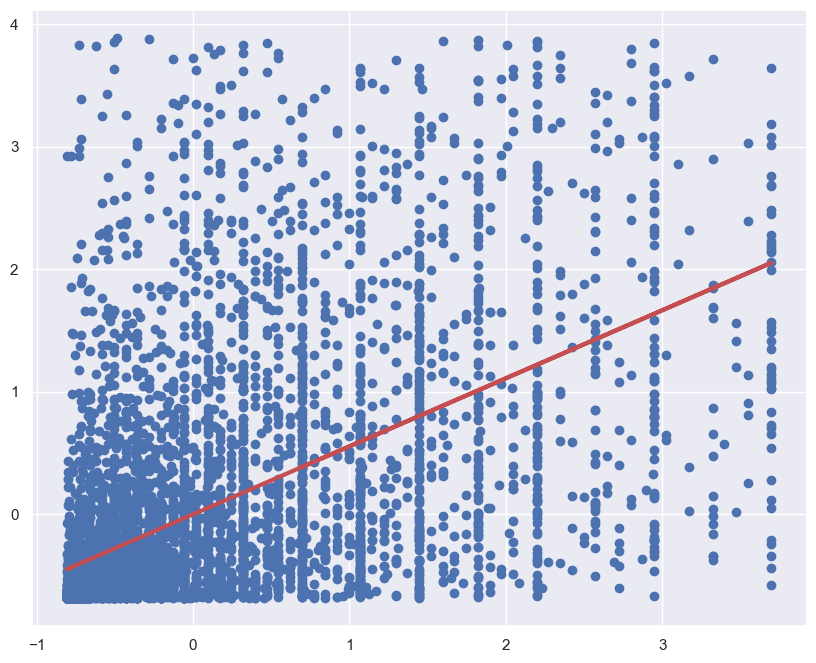

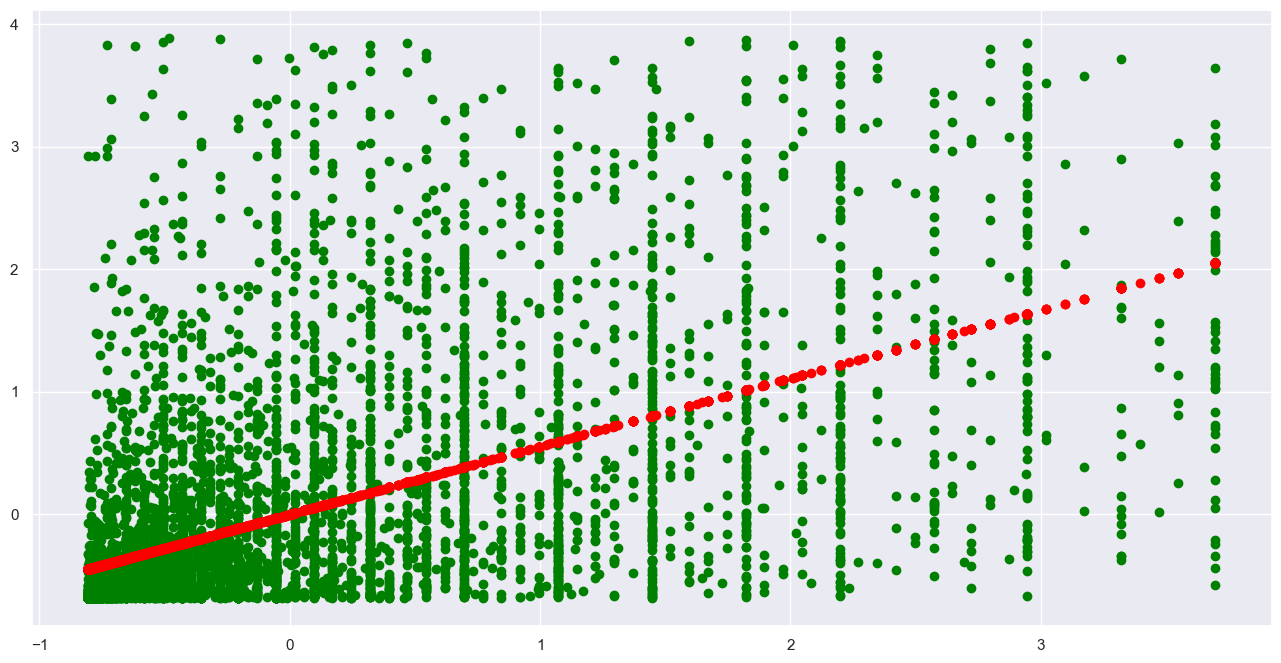

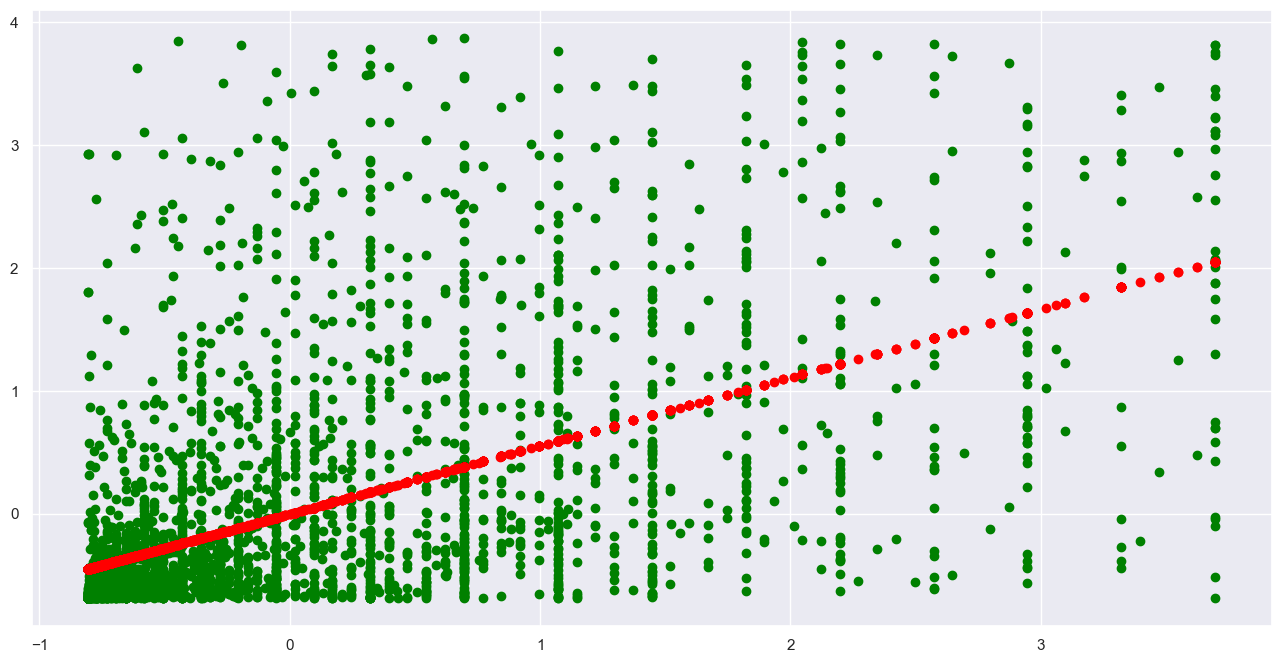

Explained Variance (R^2) on Train Set 	: 0.3132455844721611
Explained Variance (R^2) on Test Set 	: 0.3248010826994677
Training MSE: 0.67
Testing MSE: 0.70


In [207]:


# Calculate the quartiles for each column
Q1_popularity = np.percentile(df['budget'], 25)
Q3_popularity = np.percentile(df['budget'], 75)
Q1_revenue = np.percentile(df['revenue'], 25)
Q3_revenue = np.percentile(df['revenue'], 75)

# Calculate the interquartile range (IQR) for each column
IQR_popularity = Q3_popularity - Q1_popularity
IQR_revenue = Q3_revenue - Q1_revenue

# Define the lower and upper bounds for outlier detection
lower_bound_popularity = Q1_popularity - 1.5 * IQR_popularity
upper_bound_popularity = Q3_popularity + 1.5 * IQR_popularity
lower_bound_revenue = Q1_revenue - 1.5 * IQR_revenue
upper_bound_revenue = Q3_revenue + 1.5 * IQR_revenue

# Remove outliers from the DataFrame
df1 = df[(df['budget'] >= lower_bound_popularity) & (df['budget'] <= upper_bound_popularity) &
        (df['revenue'] >= lower_bound_revenue) & (df['revenue'] <= upper_bound_revenue)]

# Extract the updated 'popularity' and 'revenue' columns without outliers
X = df1['budget'].values
Y = df1['revenue'].values


scaler = StandardScaler()

# Standardize the training data
X_scaled = scaler.fit_transform(X.reshape(-1, 1))
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).flatten()

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.35)
linreg = LinearRegression()



# Fit the model on the scaled training data
linreg.fit(X_train, Y_train)

regline_x = X_train

regline_y = linreg.intercept_ + linreg.coef_ * regline_x

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(10, 8))

plt.scatter(X_train, Y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth=3)
plt.show()


Y_train_pred = linreg.predict(X_train)
# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train,Y_train, color = "green")
plt.scatter(X_train,Y_train_pred, color = "red")
plt.show()

Y_test_pred = linreg.predict(X_test)
# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_test,Y_test, color = "green")
plt.scatter(X_test,Y_test_pred, color = "red")
plt.show()

print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, Y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(X_test, Y_test))

Y_train_pred = linreg.predict(X_train)
train_mse = mean_squared_error(Y_train, Y_train_pred)
print(f'Training MSE: {train_mse:.2f}')

# Calculate the MSE for the testing data
Y_test_pred = linreg.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_test_pred)
print(f'Testing MSE: {test_mse:.2f}')

In [208]:

X = df['popularity'].values
Y = df['revenue'].values



In [209]:

scaler = StandardScaler()

# Standardize the training data
X_scaled = scaler.fit_transform(X.reshape(-1, 1))
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).flatten()

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.35)
linreg = LinearRegression()



# Fit the model on the scaled training data
linreg.fit(X_train, Y_train)

LinearRegression()

In [210]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  0.015742587335957695
Coefficients 	: a =  [0.28392037]


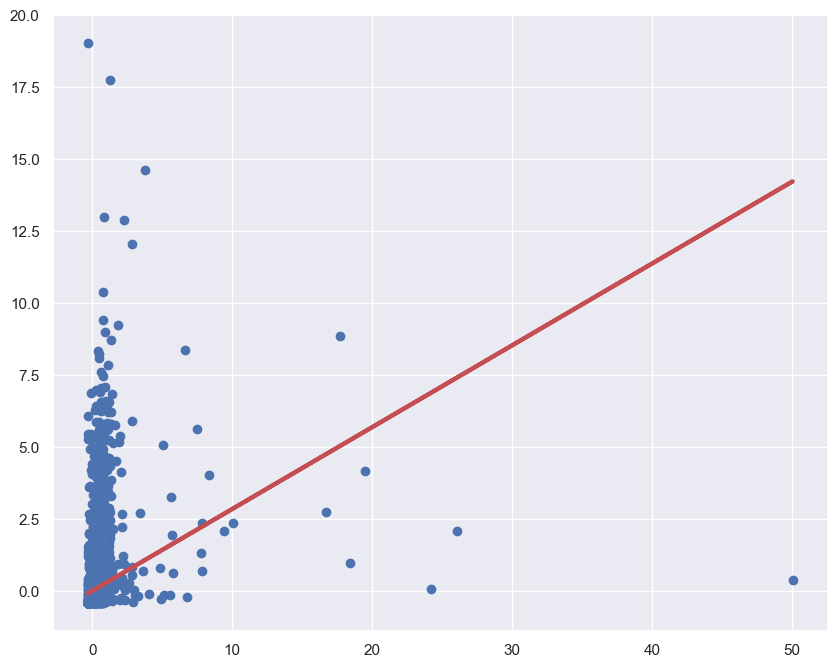

In [211]:
regline_x = X_train

regline_y = linreg.intercept_ + linreg.coef_ * regline_x

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(10, 8))

plt.scatter(X_train, Y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth=3)
plt.show()

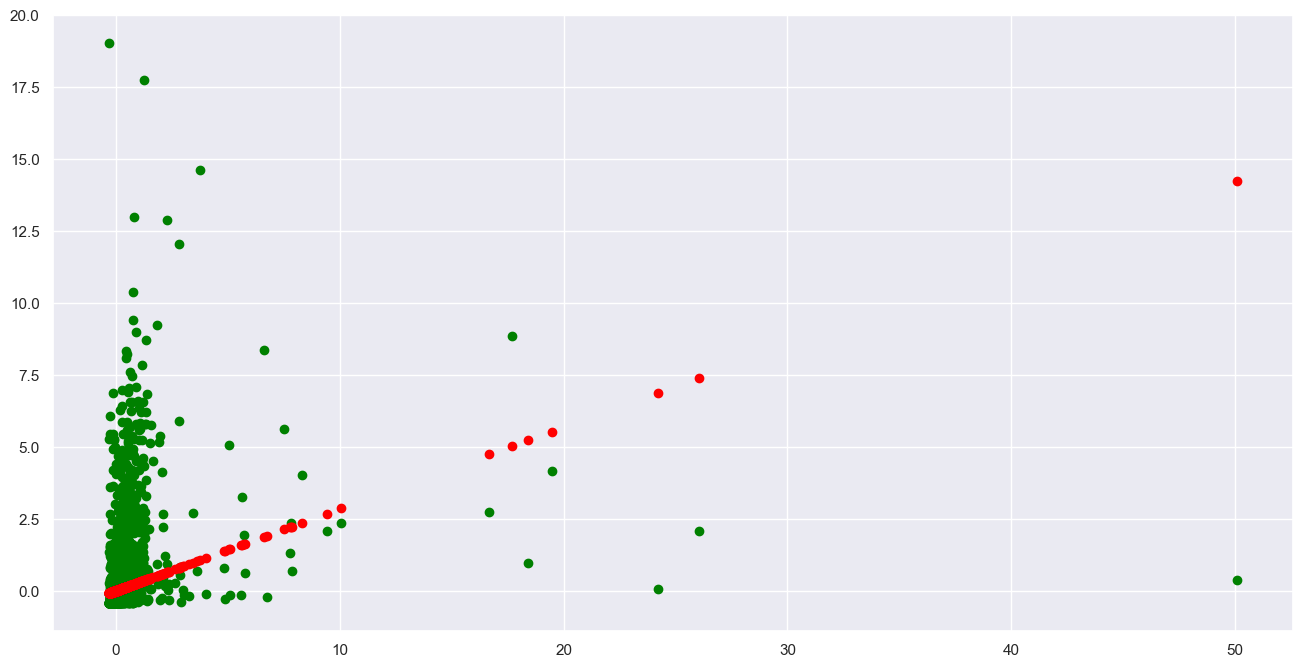

In [212]:
Y_train_pred = linreg.predict(X_train)
# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train,Y_train, color = "green")
plt.scatter(X_train,Y_train_pred, color = "red")
plt.show()

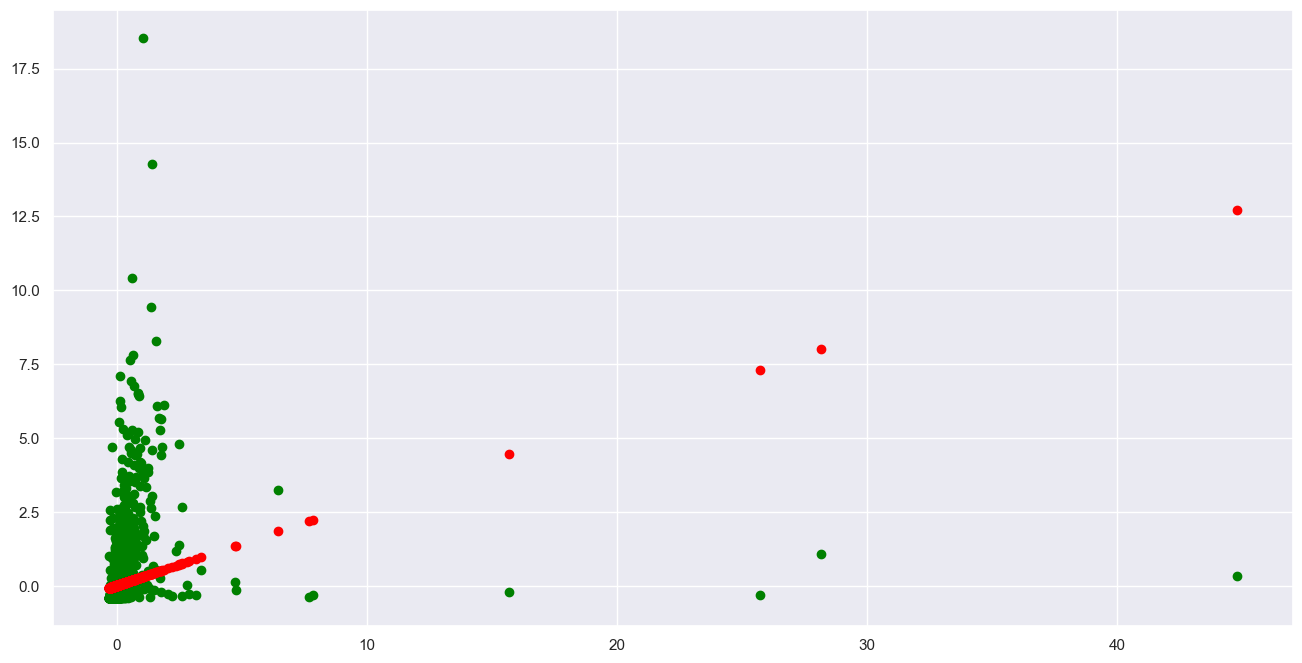

In [213]:
Y_test_pred = linreg.predict(X_test)
# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_test,Y_test, color = "green")
plt.scatter(X_test,Y_test_pred, color = "red")
plt.show()

In [214]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, Y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(X_test, Y_test))

Y_train_pred = linreg.predict(X_train)
train_mse = mean_squared_error(Y_train, Y_train_pred)
print(f'Training MSE: {train_mse:.2f}')

# Calculate the MSE for the testing data
Y_test_pred = linreg.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_test_pred)
print(f'Testing MSE: {test_mse:.2f}')

Explained Variance (R^2) on Train Set 	: 0.0702430431412312
Explained Variance (R^2) on Test Set 	: 0.003563467342156512
Training MSE: 1.00
Testing MSE: 0.86


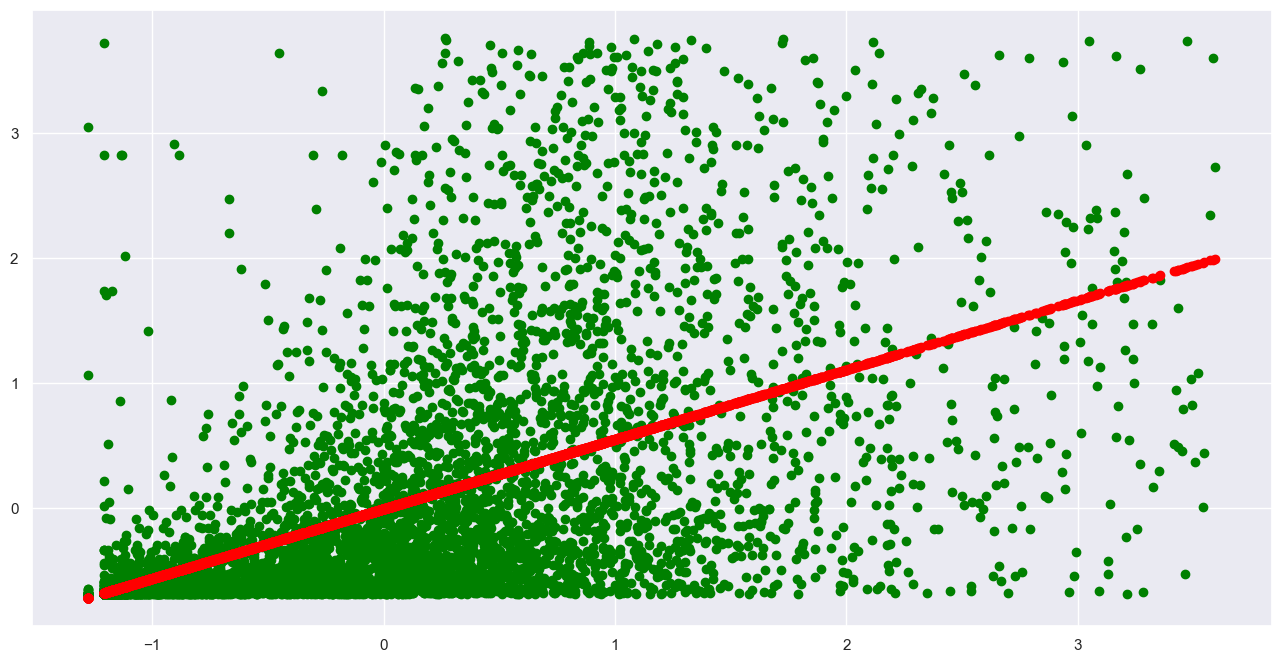

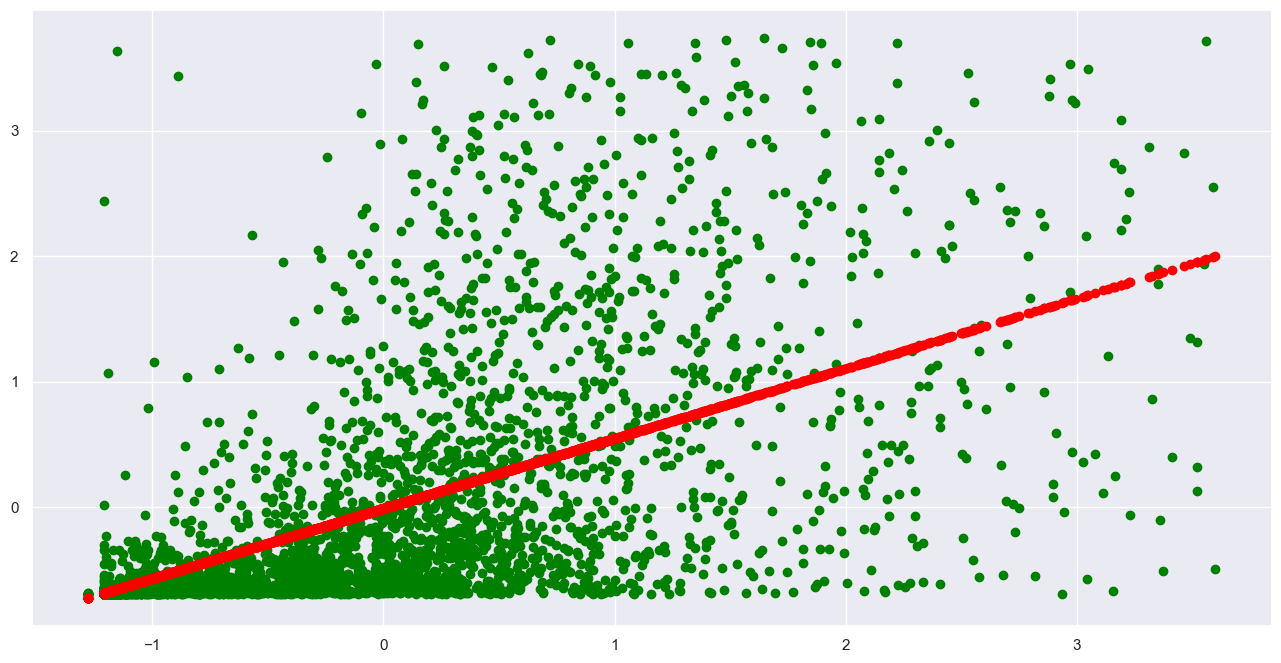

Explained Variance (R^2) on Train Set 	: 0.3151055936572388
Explained Variance (R^2) on Test Set 	: 0.33684595680860796
Training MSE: 0.67
Testing MSE: 0.68


In [216]:

# Calculate the quartiles for each column
Q1_popularity = np.percentile(df['popularity'], 25)
Q3_popularity = np.percentile(df['popularity'], 75)
Q1_revenue = np.percentile(df['revenue'], 25)
Q3_revenue = np.percentile(df['revenue'], 75)

# Calculate the interquartile range (IQR) for each column
IQR_popularity = Q3_popularity - Q1_popularity
IQR_revenue = Q3_revenue - Q1_revenue

# Define the lower and upper bounds for outlier detection
lower_bound_popularity = Q1_popularity - 1.5 * IQR_popularity
upper_bound_popularity = Q3_popularity + 1.5 * IQR_popularity
lower_bound_revenue = Q1_revenue - 1.5 * IQR_revenue
upper_bound_revenue = Q3_revenue + 1.5 * IQR_revenue

# Remove outliers from the DataFrame
df2 = df[(df['popularity'] >= lower_bound_popularity) & (df['popularity'] <= upper_bound_popularity) &
        (df['revenue'] >= lower_bound_revenue) & (df['revenue'] <= upper_bound_revenue)]

# Extract the updated 'popularity' and 'revenue' columns without outliers
X = df2['popularity'].values
Y = df2['revenue'].values

scaler = StandardScaler()

# Standardize the training data
X_scaled = scaler.fit_transform(X.reshape(-1, 1))
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).flatten()

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.35)
linreg = LinearRegression()



# Fit the model on the scaled training data
linreg.fit(X_train, Y_train)

Y_train_pred = linreg.predict(X_train)
# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train,Y_train, color = "green")
plt.scatter(X_train,Y_train_pred, color = "red")
plt.show()

Y_test_pred = linreg.predict(X_test)
# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_test,Y_test, color = "green")
plt.scatter(X_test,Y_test_pred, color = "red")
plt.show()

print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, Y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(X_test, Y_test))

Y_train_pred = linreg.predict(X_train)
train_mse = mean_squared_error(Y_train, Y_train_pred)
print(f'Training MSE: {train_mse:.2f}')

# Calculate the MSE for the testing data
Y_test_pred = linreg.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_test_pred)
print(f'Testing MSE: {test_mse:.2f}')

In [131]:
X = df['vote_count'].values
Y = df['revenue'].values

In [132]:

scaler = StandardScaler()

# Standardize the training data
X_scaled = scaler.fit_transform(X.reshape(-1, 1))
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).flatten()

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.35)
linreg = LinearRegression()



# Fit the model on the scaled training data
linreg.fit(X_train, Y_train)

LinearRegression()

In [133]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  -0.004340368248549934
Coefficients 	: a =  [0.170228]


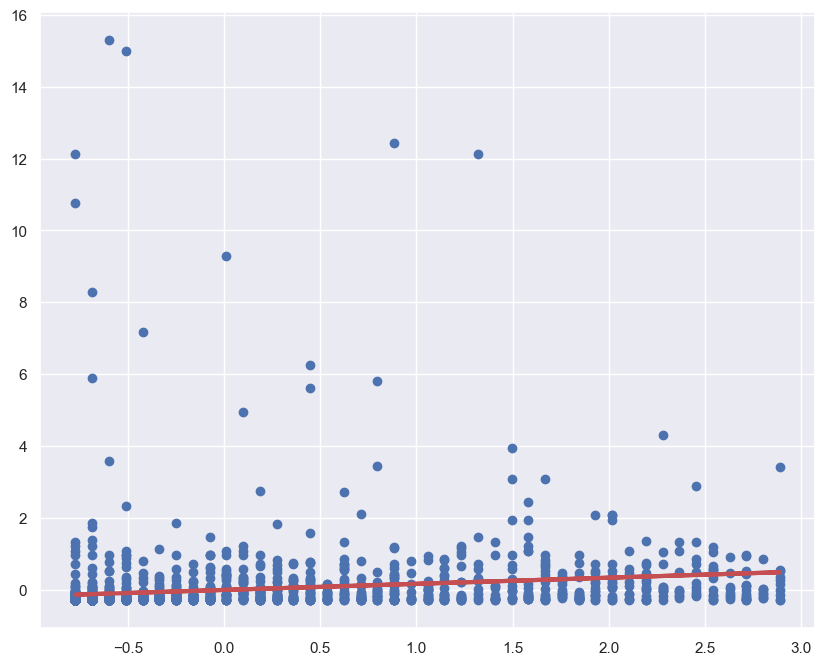

In [134]:
regline_x = X_train

regline_y = linreg.intercept_ + linreg.coef_ * regline_x

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(10, 8))

plt.scatter(X_train, Y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth=3)
plt.show()

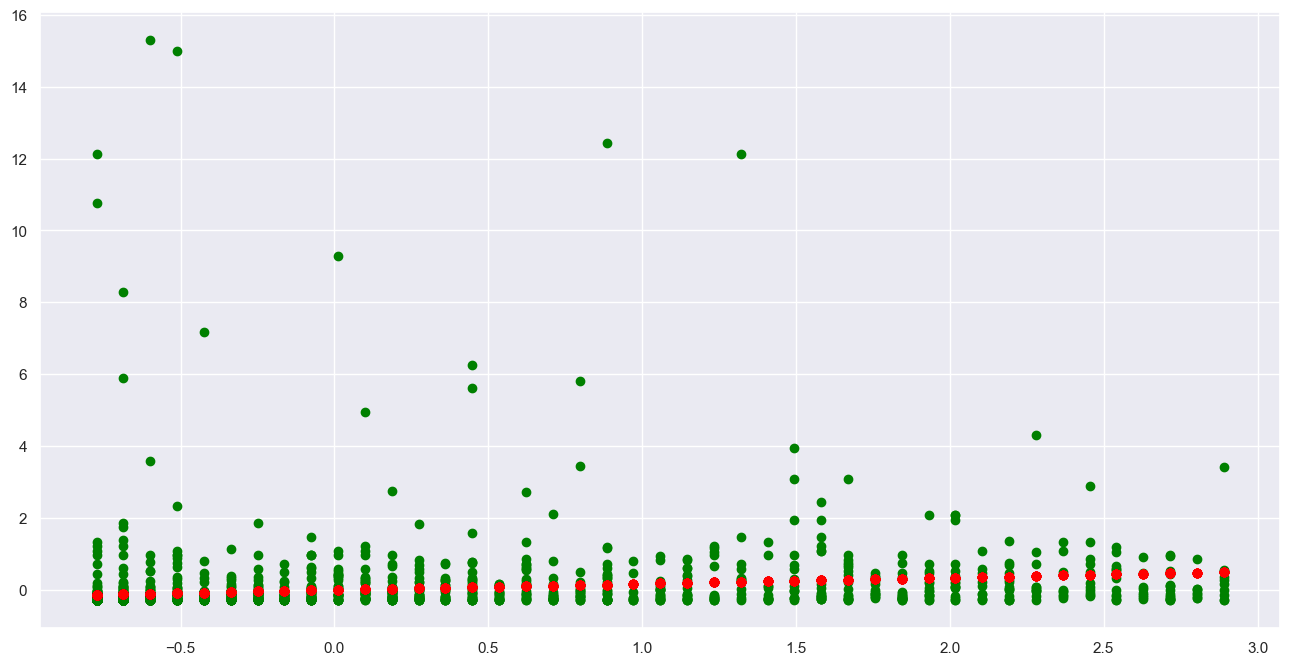

In [135]:
Y_train_pred = linreg.predict(X_train)
# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train,Y_train, color = "green")
plt.scatter(X_train,Y_train_pred, color = "red")
plt.show()

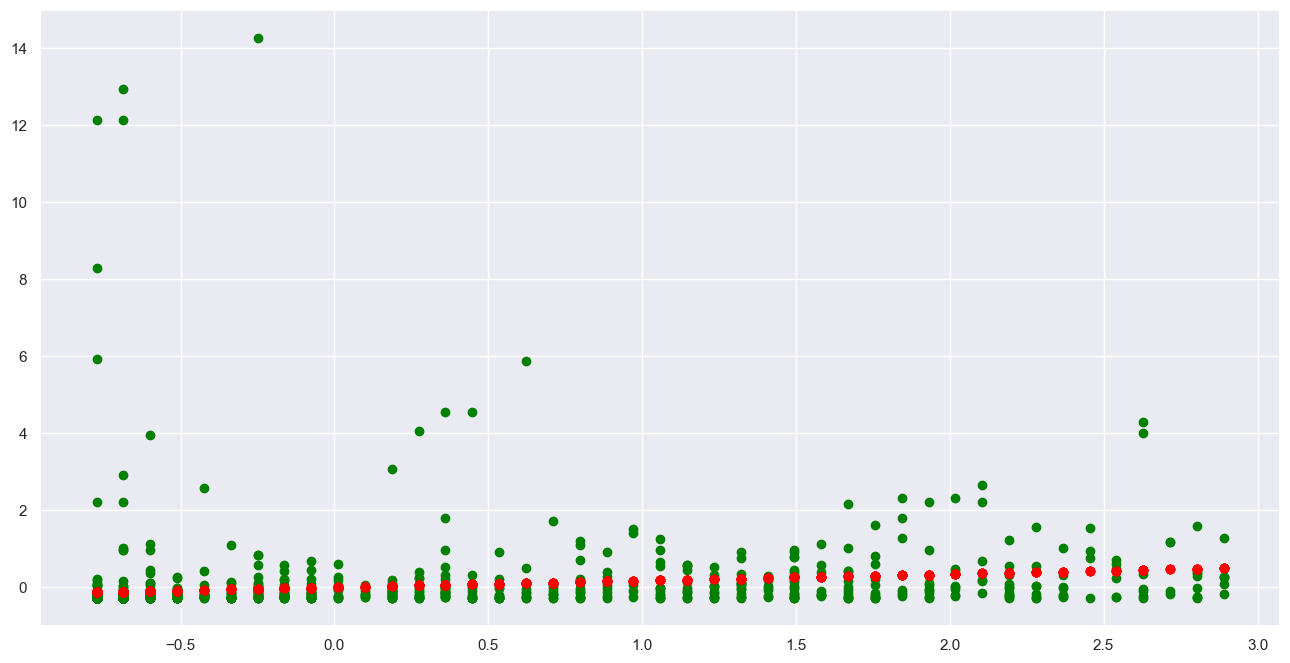

In [136]:
Y_test_pred = linreg.predict(X_test)
# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_test,Y_test, color = "green")
plt.scatter(X_test,Y_test_pred, color = "red")
plt.show()

In [137]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, Y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(X_test, Y_test))

Y_train_pred = linreg.predict(X_train)
train_mse = mean_squared_error(Y_train, Y_train_pred)
print(f'Training MSE: {train_mse:.2f}')

# Calculate the MSE for the testing data
Y_test_pred = linreg.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_test_pred)
print(f'Testing MSE: {test_mse:.2f}')

Explained Variance (R^2) on Train Set 	: 0.029603120290643492
Explained Variance (R^2) on Test Set 	: 0.020553826824545318
Training MSE: 0.92
Testing MSE: 1.07


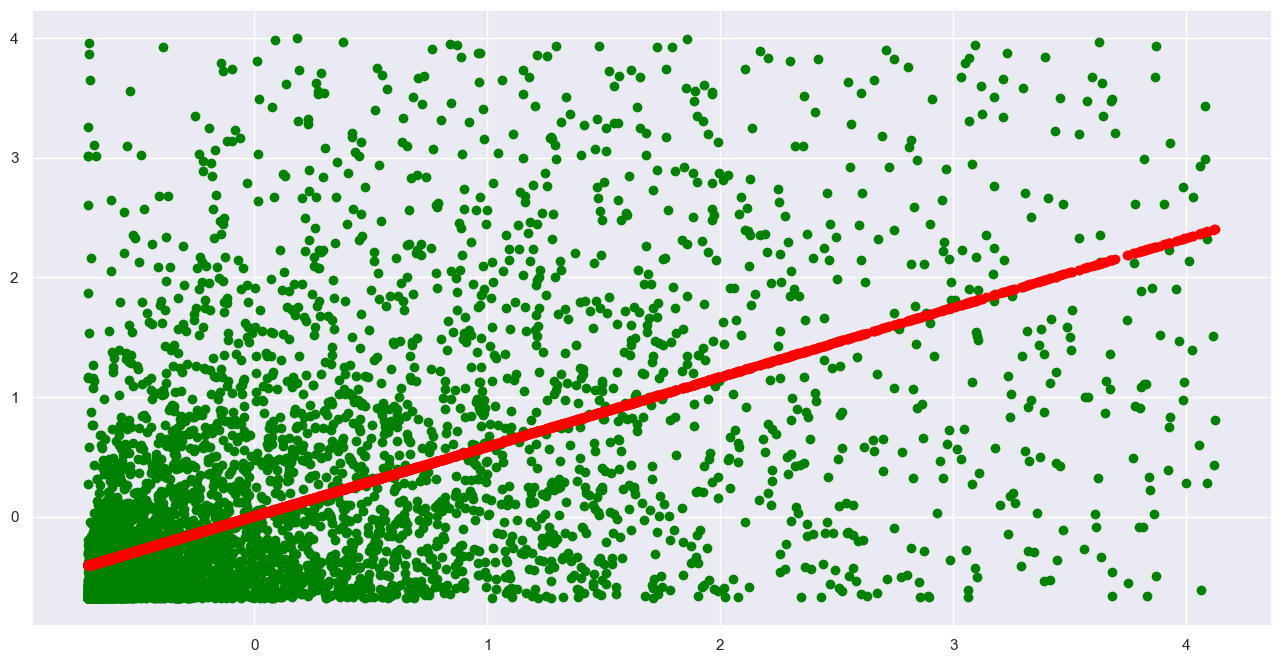

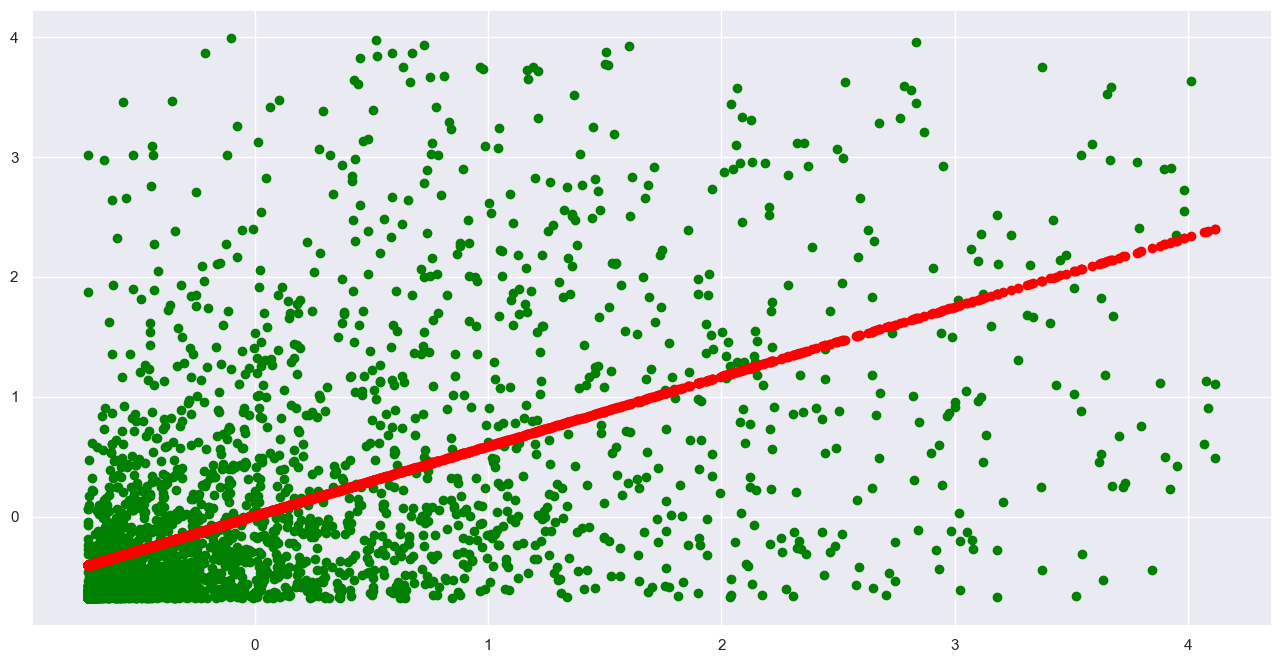

Explained Variance (R^2) on Train Set 	: 0.3334766311829892
Explained Variance (R^2) on Test Set 	: 0.32213300094875597
Training MSE: 0.68
Testing MSE: 0.65


In [218]:

# Calculate the quartiles for each column
Q1_popularity = np.percentile(df['vote_count'], 25)
Q3_popularity = np.percentile(df['vote_count'], 75)
Q1_revenue = np.percentile(df['revenue'], 25)
Q3_revenue = np.percentile(df['revenue'], 75)

# Calculate the interquartile range (IQR) for each column
IQR_popularity = Q3_popularity - Q1_popularity
IQR_revenue = Q3_revenue - Q1_revenue

# Define the lower and upper bounds for outlier detection
lower_bound_popularity = Q1_popularity - 1.5 * IQR_popularity
upper_bound_popularity = Q3_popularity + 1.5 * IQR_popularity
lower_bound_revenue = Q1_revenue - 1.5 * IQR_revenue
upper_bound_revenue = Q3_revenue + 1.5 * IQR_revenue

# Remove outliers from the DataFrame
df3 = df[(df['vote_count'] >= lower_bound_popularity) & (df['vote_count'] <= upper_bound_popularity) &
        (df['revenue'] >= lower_bound_revenue) & (df['revenue'] <= upper_bound_revenue)]

# Extract the updated 'popularity' and 'revenue' columns without outliers
X = df3['vote_count'].values
Y = df3['revenue'].values

scaler = StandardScaler()

# Standardize the training data
X_scaled = scaler.fit_transform(X.reshape(-1, 1))
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).flatten()

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.35)
linreg = LinearRegression()



# Fit the model on the scaled training data
linreg.fit(X_train, Y_train)

Y_train_pred = linreg.predict(X_train)
# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train,Y_train, color = "green")
plt.scatter(X_train,Y_train_pred, color = "red")
plt.show()

Y_test_pred = linreg.predict(X_test)
# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_test,Y_test, color = "green")
plt.scatter(X_test,Y_test_pred, color = "red")
plt.show()

print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, Y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(X_test, Y_test))

Y_train_pred = linreg.predict(X_train)
train_mse = mean_squared_error(Y_train, Y_train_pred)
print(f'Training MSE: {train_mse:.2f}')

# Calculate the MSE for the testing data
Y_test_pred = linreg.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_test_pred)
print(f'Testing MSE: {test_mse:.2f}')